In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from datetime import time

In [2]:
boston = datasets.load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
X = boston.data
y = boston.target

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0) #random_state 
#takes values between 0 and 100 as randomness seed value

In [12]:
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [13]:
x_test = X[:20]

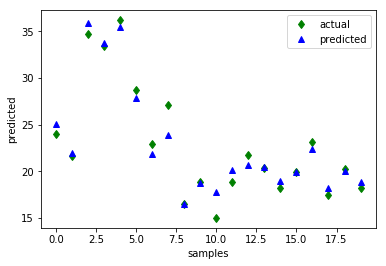

In [14]:
plt.figure()
plt.plot(y[:20], 'gd', label="actual") #green diamonds
plt.plot(regressor.predict(x_test), 'b^', label="predicted") #blue triangles
plt.ylabel('predicted')
plt.xlabel('samples')
plt.legend()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
df = pd.read_csv('.\\datasets\\Gym_Data.csv')

In [28]:
df.count()

number_people           62184
date                    62184
timestamp               62184
day_of_week             62184
is_weekend              62184
is_holiday              62184
temperature             62184
is_start_of_semester    62184
is_during_semester      62184
month                   62184
hour                    62184
dtype: int64

In [7]:
df = df.drop("date", axis=1)
df.head(2)

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,71.76,0,0,8,17
1,45,62414,4,0,0,71.76,0,0,8,17


In [8]:
def time_to_seconds(time):
    return time.hour*3600 + time.minute*60 + time.second

In [10]:
noon = time_to_seconds(time(12,0,0))
df.timestamp = df.timestamp.apply(lambda t: abs(t - noon))

In [11]:
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,18011,4,0,0,71.76,0,0,8,17
1,45,19214,4,0,0,71.76,0,0,8,17
2,40,19815,4,0,0,71.76,0,0,8,17
3,44,20416,4,0,0,71.76,0,0,8,17
4,45,21017,4,0,0,71.76,0,0,8,17


In [14]:
#encoding categorical columns
columns = ["day_of_week", "month", "hour"]
df = pd.get_dummies(df, columns=columns)
df.head(2)

,number_people,timestamp,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,day_of_week_0,day_of_week_1,day_of_week_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,37,18011,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,45,19214,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [22]:
data = df.values
X = data[:, 1:]
y = data[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=42)

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1)

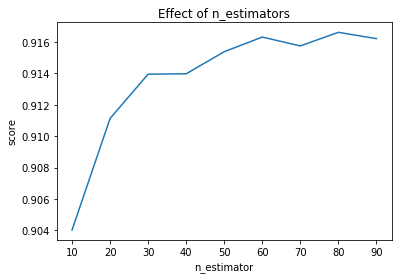

In [25]:
estimators = np.arange(10,100,10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)